In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [482]:
# Data ingestion

In [483]:
df=pd.read_csv("/content/drive/MyDrive/Vidhi (Rinex AI july 2023) Major Project/fruit_data_with_colors.txt",sep="\t")

In [484]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [486]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [487]:
df.duplicated().sum()

0

In [488]:
df["fruit_name"].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [489]:
df["fruit_label"].value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [490]:
df["fruit_subtype"].value_counts()

turkey_navel        10
unknown             10
cripps_pink          6
selected_seconds     6
spanish_belsan       6
mandarin             5
braeburn             5
golden_delicious     5
granny_smith         3
spanish_jumbo        3
Name: fruit_subtype, dtype: int64

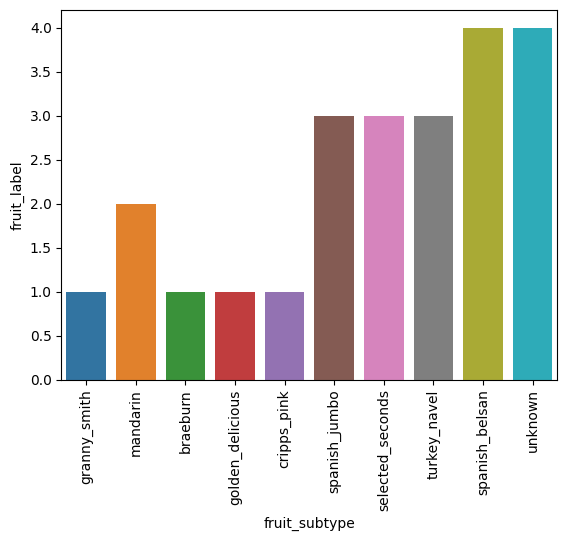

In [491]:
sns.barplot(x=df['fruit_subtype'],y=df['fruit_label'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [492]:
fruit_dict=pd.Series(df.fruit_name.values,index=df.fruit_label).to_dict()
fruit_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [493]:
df_apple=df[df["fruit_label"]==1]
df_orange=df[df["fruit_label"]==3]
df_lemon=df[df["fruit_label"]==4]
df_mandarin=df[df["fruit_label"]==2]

In [494]:
df_apple

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69


In [495]:
df_apple["fruit_subtype"].value_counts()

cripps_pink         6
braeburn            5
golden_delicious    5
granny_smith        3
Name: fruit_subtype, dtype: int64

<Axes: >

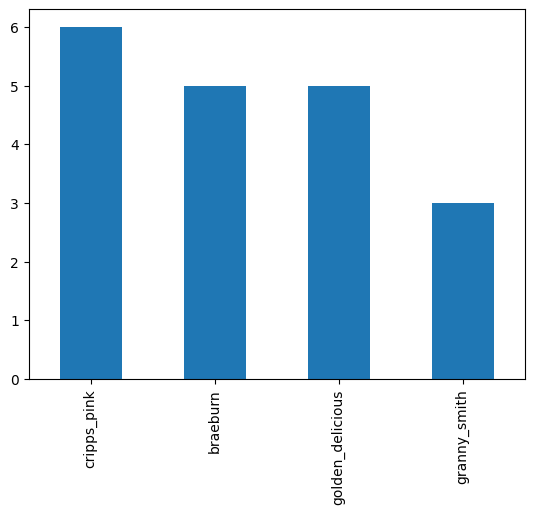

In [496]:
df_apple["fruit_subtype"].value_counts().plot(kind="bar")

In [497]:
# There are 4 sub types of apples, cripps_pink being maximum in number.

In [498]:
df_orange

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72
29,3,orange,selected_seconds,160,7.0,7.4,0.81
30,3,orange,selected_seconds,158,7.1,7.5,0.79
31,3,orange,selected_seconds,210,7.8,8.0,0.82
32,3,orange,selected_seconds,164,7.2,7.0,0.80
33,3,orange,turkey_navel,190,7.5,8.1,0.74


In [499]:
df_orange["fruit_subtype"].value_counts()

turkey_navel        10
selected_seconds     6
spanish_jumbo        3
Name: fruit_subtype, dtype: int64

<Axes: >

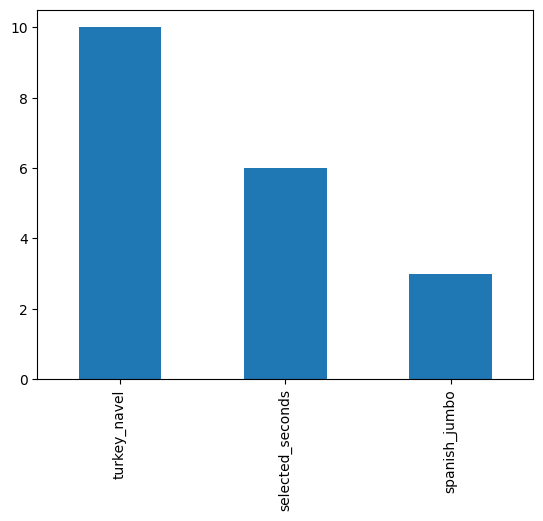

In [500]:
df_orange["fruit_subtype"].value_counts().plot(kind="bar")

In [501]:
# There are 3 sub types of orange, turkey_navel being maximum in number.

In [502]:
df_lemon

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72
48,4,lemon,spanish_belsan,174,7.3,10.1,0.72
49,4,lemon,unknown,132,5.8,8.7,0.73
50,4,lemon,unknown,130,6.0,8.2,0.71
51,4,lemon,unknown,116,6.0,7.5,0.72
52,4,lemon,unknown,118,5.9,8.0,0.72


In [503]:
df_lemon["fruit_subtype"].value_counts()

unknown           10
spanish_belsan     6
Name: fruit_subtype, dtype: int64

<Axes: >

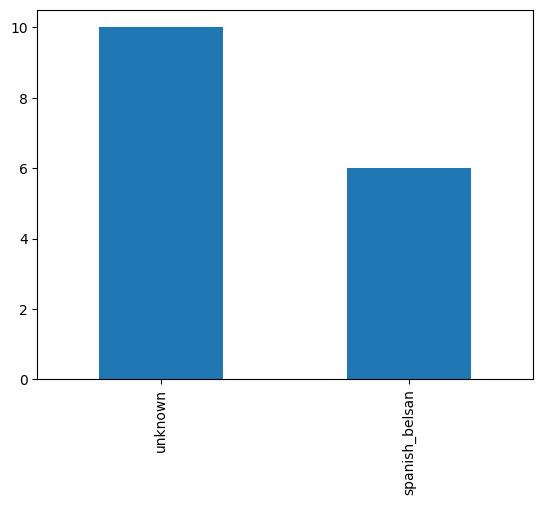

In [504]:
df_lemon["fruit_subtype"].value_counts().plot(kind="bar")

In [505]:
# majority subtypes of lemon are unknown rest are spanish_belsan.

In [506]:
df_mandarin

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


In [507]:
df_mandarin["fruit_subtype"].value_counts()

mandarin    5
Name: fruit_subtype, dtype: int64

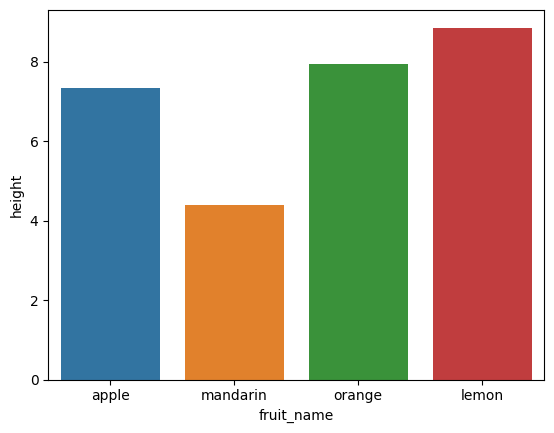

In [508]:
sns.barplot(x=df['fruit_name'],y=df['height'],errorbar=None)
plt.show()

In [509]:
# Lemons have the maximum height and mandarin the least.

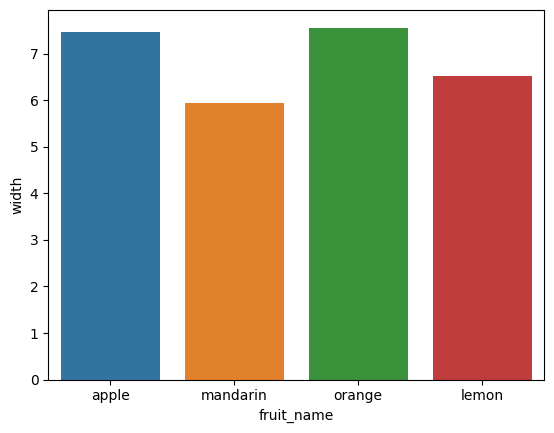

In [510]:
sns.barplot(x=df['fruit_name'],y=df['width'],errorbar=None)
plt.show()

In [511]:
# Orange have the maximum height and Mandarin the least

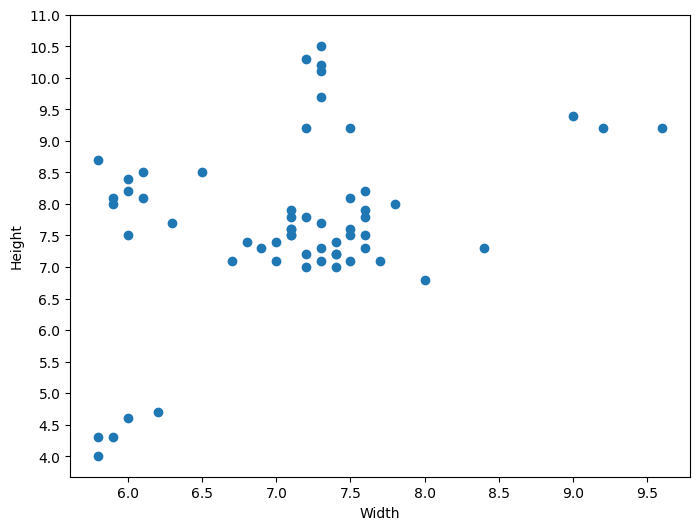

In [512]:
plt.figure(figsize=(8,6))
plt.scatter(df["width"],df["height"])
plt.xlabel("Width")
plt.ylabel("Height")
plt.yticks(np.arange(4,11.5,0.5))
plt.show()

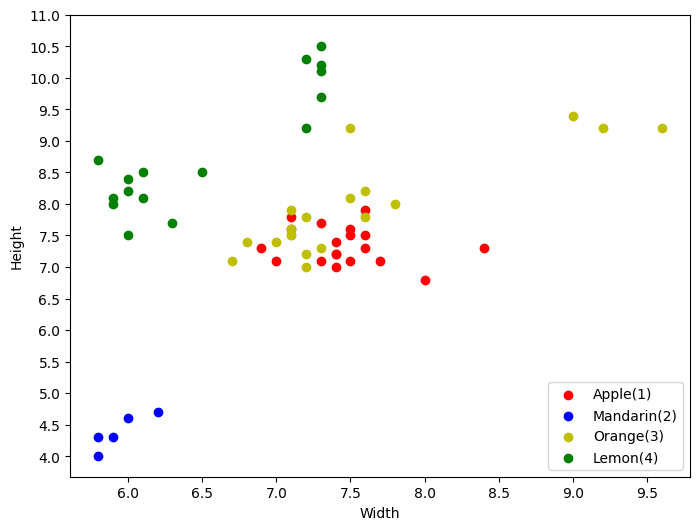

In [513]:
plt.figure(figsize=(8,6))
plt.scatter(df_apple["width"],df_apple["height"],label="Apple(1)",color="r")
plt.scatter(df_mandarin["width"],df_mandarin["height"],label="Mandarin(2)",color="b")
plt.scatter(df_orange["width"],df_orange["height"],label="Orange(3)",color="y")
plt.scatter(df_lemon["width"],df_lemon["height"],label="Lemon(4)",color="g")
plt.xlabel("Width")
plt.ylabel("Height")
plt.yticks(np.arange(4,11.5,0.5))
plt.legend(loc="lower right")
plt.show()

In [514]:
# Mandarin are smaller in size with low width and height.
# Apples have moderate height (between 6.5 to 8) and moderate width (between 6.5 to 8.5)
# Lemons are taller but have small width
# Some oranges have height and width similar to apples, rest have larger width.

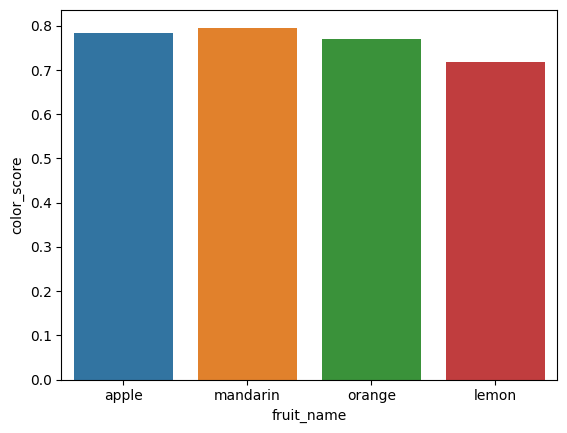

In [515]:
sns.barplot(x=df['fruit_name'],y=df['color_score'],errorbar=None)
plt.show()

In [516]:
# color score of all the fruits lie in between 0.7 to 0.8
# lemon has least color score and mandarin has maximum.

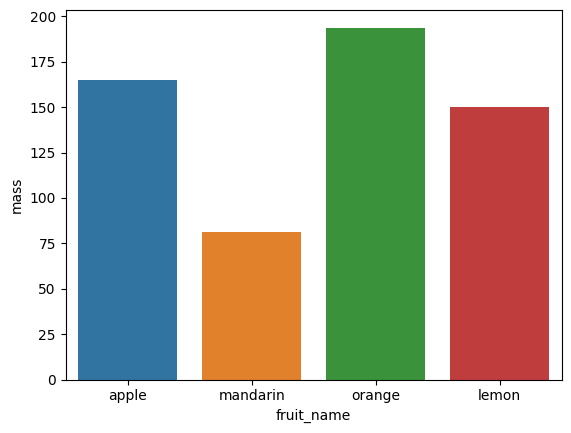

In [517]:
sns.barplot(x=df['fruit_name'],y=df['mass'],errorbar=None)
plt.show()

In [518]:
# Orange have the maximum mass followed by apple and then lemon.
# Mandarin have the minimum mass.

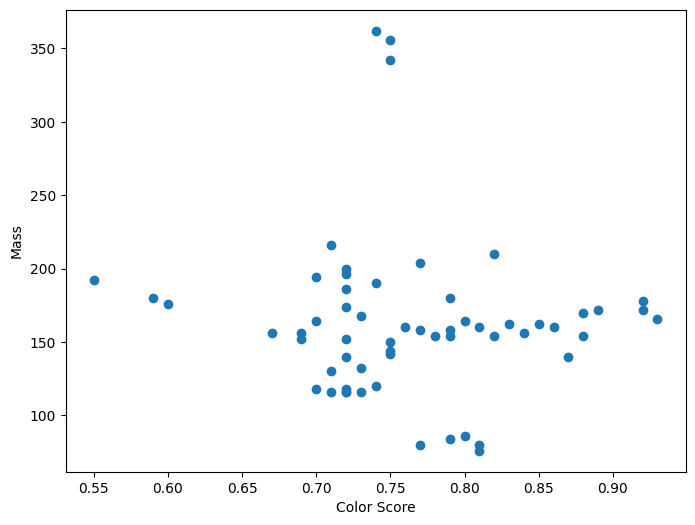

In [519]:
plt.figure(figsize=(8,6))
plt.scatter(df["color_score"],df["mass"])
plt.xlabel("Color Score")
plt.ylabel("Mass")
plt.show()

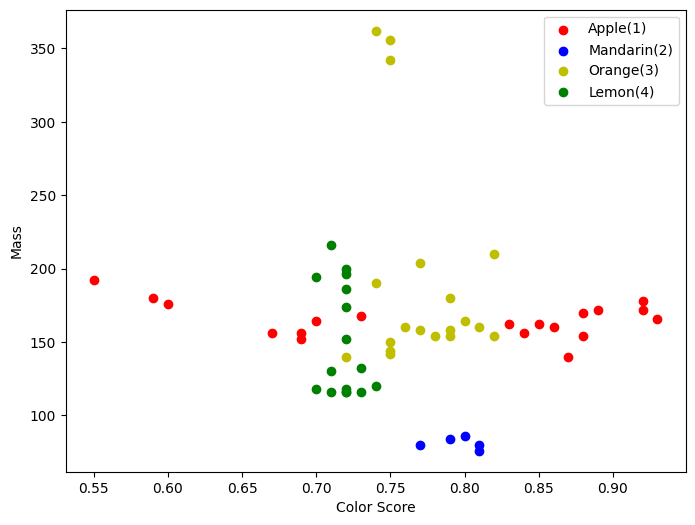

In [520]:
plt.figure(figsize=(8,6))
plt.scatter(df_apple["color_score"],df_apple["mass"],label="Apple(1)",color="r")
plt.scatter(df_mandarin["color_score"],df_mandarin["mass"],label="Mandarin(2)",color="b")
plt.scatter(df_orange["color_score"],df_orange["mass"],label="Orange(3)",color="y")
plt.scatter(df_lemon["color_score"],df_lemon["mass"],label="Lemon(4)",color="g")
plt.xlabel("Color Score")
plt.ylabel("Mass")
plt.legend(loc="upper right")
plt.show()

In [521]:
# Apple have their color score distributed throughout the range and their mass lies between 150 to 200.
# Mandarin's color score lies between 0.75 to 0.82 with mass lying below 100.
# Lemons have their color score between 0.70 to 0.75 and mass between 100 to 250
# Oranges have their color score between 0.70 to 0.84. most of them have a mass between 100 to 200 except few having mass around 350.

In [522]:
df.drop(columns=["fruit_name","fruit_subtype"],inplace=True)
# Droping the columns fruit_name and fruit_subtype
df.sample()

,fruit_label,mass,width,height,color_score
24,3,342,9.0,9.4,0.75


In [523]:
# Splitting the data set into train and test set.

In [524]:
x=df.drop(columns=["fruit_label"])
y=df["fruit_label"]

In [525]:
from sklearn.model_selection import train_test_split

In [526]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=21)

In [527]:
# Importing different classifiers

In [528]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [529]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [530]:
# KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
model1.fit(x,y)
y_pred1=model1.predict(x)

In [531]:
accuracy_score(y,y_pred1)

0.8305084745762712

In [532]:
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83        19
           2       1.00      1.00      1.00         5
           3       0.87      0.68      0.76        19
           4       1.00      0.75      0.86        16

    accuracy                           0.83        59
   macro avg       0.89      0.86      0.86        59
weighted avg       0.86      0.83      0.83        59



In [533]:
pd.DataFrame(confusion_matrix(y,y_pred1),index=['1 (Apple_A)','2 (Mandarin_A)','3 (Orange_A)','4 (Lemon_A)'],columns=['1 (Apple_P)','2 (Mandarin_P)','3 (Orange_P)','4 (Lemon_P)'])

,1 (Apple_P),2 (Mandarin_P),3 (Orange_P),4 (Lemon_P)
1 (Apple_A),19,0,0,0
2 (Mandarin_A),0,5,0,0
3 (Orange_A),6,0,13,0
4 (Lemon_A),2,0,2,12


In [534]:
# DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=4,min_samples_leaf=6)
model2.fit(x,y)
y_pred2=model2.predict(x)

In [535]:
accuracy_score(y,y_pred2)

0.8983050847457628

In [536]:
print(classification_report(y,y_pred2))

              precision    recall  f1-score   support

           1       0.83      1.00      0.90        19
           2       0.71      1.00      0.83         5
           3       1.00      0.79      0.88        19
           4       1.00      0.88      0.93        16

    accuracy                           0.90        59
   macro avg       0.89      0.92      0.89        59
weighted avg       0.92      0.90      0.90        59



In [537]:
pd.DataFrame(confusion_matrix(y,y_pred2),index=['1 (Apple_A)','2 (Mandarin_A)','3 (Orange_A)','4 (Lemon_A)'],columns=['1 (Apple_P)','2 (Mandarin_P)','3 (Orange_P)','4 (Lemon_P)'])

,1 (Apple_P),2 (Mandarin_P),3 (Orange_P),4 (Lemon_P)
1 (Apple_A),19,0,0,0
2 (Mandarin_A),0,5,0,0
3 (Orange_A),4,0,15,0
4 (Lemon_A),0,2,0,14


In [538]:
# RandomForestClassifier
model3=RandomForestClassifier(max_depth=2,n_estimators=3)
model3.fit(x,y)
y_pred3=model3.predict(x)

In [539]:
accuracy_score(y,y_pred3)

0.7627118644067796

In [540]:
print(classification_report(y,y_pred3))

              precision    recall  f1-score   support

           1       0.82      0.74      0.78        19
           2       1.00      1.00      1.00         5
           3       0.59      0.84      0.70        19
           4       1.00      0.62      0.77        16

    accuracy                           0.76        59
   macro avg       0.85      0.80      0.81        59
weighted avg       0.81      0.76      0.77        59



In [541]:
pd.DataFrame(confusion_matrix(y,y_pred3),index=['1 (Apple_A)','2 (Mandarin_A)','3 (Orange_A)','4 (Lemon_A)'],columns=['1 (Apple_P)','2 (Mandarin_P)','3 (Orange_P)','4 (Lemon_P)'])

,1 (Apple_P),2 (Mandarin_P),3 (Orange_P),4 (Lemon_P)
1 (Apple_A),14,0,5,0
2 (Mandarin_A),0,5,0,0
3 (Orange_A),3,0,16,0
4 (Lemon_A),0,0,6,10


In [542]:
# LogisticRegression
model4=LogisticRegression(max_iter=4000,C=5)
model4.fit(x,y)
y_pred4=model4.predict(x)

In [543]:
accuracy_score(y,y_pred4)

0.847457627118644

In [544]:
print(classification_report(y,y_pred4))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       1.00      1.00      1.00         5
           3       0.75      0.79      0.77        19
           4       1.00      1.00      1.00        16

    accuracy                           0.85        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.85      0.85      0.85        59



In [545]:
pd.DataFrame(confusion_matrix(y,y_pred4),index=['1 (Apple_A)','2 (Mandarin_A)','3 (Orange_A)','4 (Lemon_A)'],columns=['1 (Apple_P)','2 (Mandarin_P)','3 (Orange_P)','4 (Lemon_P)'])

,1 (Apple_P),2 (Mandarin_P),3 (Orange_P),4 (Lemon_P)
1 (Apple_A),14,0,5,0
2 (Mandarin_A),0,5,0,0
3 (Orange_A),4,0,15,0
4 (Lemon_A),0,0,0,16


In [546]:
# SVC
model5=SVC(C=200,kernel='poly',degree=15)
model5.fit(x,y)
y_pred5=model5.predict(x)

In [547]:
accuracy_score(y,y_pred5)

0.7966101694915254

In [548]:
print(classification_report(y,y_pred5))

              precision    recall  f1-score   support

           1       0.82      0.74      0.78        19
           2       1.00      1.00      1.00         5
           3       0.75      0.63      0.69        19
           4       0.76      1.00      0.86        16

    accuracy                           0.80        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.80      0.80      0.79        59



In [549]:
pd.DataFrame(confusion_matrix(y,y_pred5),index=['1 (Apple_A)','2 (Mandarin_A)','3 (Orange_A)','4 (Lemon_A)'],columns=['1 (Apple_P)','2 (Mandarin_P)','3 (Orange_P)','4 (Lemon_P)'])

,1 (Apple_P),2 (Mandarin_P),3 (Orange_P),4 (Lemon_P)
1 (Apple_A),14,0,4,1
2 (Mandarin_A),0,5,0,0
3 (Orange_A),3,0,12,4
4 (Lemon_A),0,0,0,16


In [550]:
# LinearSVC
model6=LinearSVC(max_iter=5000,intercept_scaling=4)
model6.fit(x,y)
y_pred6=model6.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [551]:
accuracy_score(y,y_pred6)

0.559322033898305

In [552]:
print(classification_report(y,y_pred6))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       1.00      1.00      1.00         5
           3       0.42      0.95      0.58        19
           4       1.00      0.62      0.77        16

    accuracy                           0.56        59
   macro avg       0.60      0.64      0.59        59
weighted avg       0.49      0.56      0.48        59



In [553]:
pd.DataFrame(confusion_matrix(y,y_pred6),index=['1 (Apple)','2 (Mandarin)','3 (Orange)','4 (Lemon)'],columns=['1 (Apple)','2 (Mandarin)','3 (Orange)','4 (Lemon)'])

,1 (Apple),2 (Mandarin),3 (Orange),4 (Lemon)
1 (Apple),0,0,19,0
2 (Mandarin),0,5,0,0
3 (Orange),1,0,18,0
4 (Lemon),0,0,6,10


In [554]:
# Summary:
# DecisionTreeClassifier and RandomForestClassifier tend to do OverFitting of data. Thus they are not suitable for this dataset
# Among rest LinearSVC has least accuracy_score of 0.67. Therefore it is also not suitable for this dataset
# SVC can give 79.66% accuraccy after changing the value of different parameters.
# KNeighborsClassifier and LogisticRegression have quite close accuracy of 83.05% and 84.74% respectively.
# After neglecting DecisionTreeClassifier, LogisticRegression has the highest accuracy of 84.74%.
# Thus LogisticRegression is chosen as the final model.

In [555]:
# LogisticRegression
model4=LogisticRegression(max_iter=4000,C=5)
model4.fit(x,y)
y_pred4=model4.predict(x)

In [556]:
# For LogisticRegression model writing the following:
# accuracy_score
# classification_report
# confusion_matrix
# precision
# reccall

In [557]:
accuracy_score(y,y_pred4)

0.847457627118644

In [558]:
print(classification_report(y,y_pred4))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       1.00      1.00      1.00         5
           3       0.75      0.79      0.77        19
           4       1.00      1.00      1.00        16

    accuracy                           0.85        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.85      0.85      0.85        59



In [559]:
pd.DataFrame(confusion_matrix(y,y_pred4),index=['1 (Apple_A)','2 (Mandarin_A)','3 (Orange_A)','4 (Lemon_A)'],columns=['1 (Apple_P)','2 (Mandarin_P)','3 (Orange_P)','4 (Lemon_P)'])

,1 (Apple_P),2 (Mandarin_P),3 (Orange_P),4 (Lemon_P)
1 (Apple_A),14,0,5,0
2 (Mandarin_A),0,5,0,0
3 (Orange_A),4,0,15,0
4 (Lemon_A),0,0,0,16


In [560]:
print("Precision for 1(Apple) =",14/18)
print("Recall for 1(Apple) =",14/19)
print("Precision for 2(Mandarin) =",5/5)
print("Recall for 2(Mandarin) =",5/5)
print("Precision for 3(Orange) =",15/20)
print("Recall for 3(Orange) =",15/19)
print("Precision for 4(Lemon) =",16/16)
print("Recall for 4(Lemon) =",16/16)

Precision for 1(Apple) = 0.7777777777777778
Recall for 1(Apple) = 0.7368421052631579
Precision for 2(Mandarin) = 1.0
Recall for 2(Mandarin) = 1.0
Precision for 3(Orange) = 0.75
Recall for 3(Orange) = 0.7894736842105263
Precision for 4(Lemon) = 1.0
Recall for 4(Lemon) = 1.0


In [561]:
# Streamlit application

In [562]:
import joblib
joblib.dump(model4,'LogisticRegression_model')

['LogisticRegression_model']

In [563]:
!pip install streamlit --quiet

In [564]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load("LogisticRegression_model")

st.title("App for predicting Fruit type based on it's mass, width, height, color score")
mass=st.number_input("Mass",min_value=70,max_value=370,value=200)
width=st.number_input("Width",min_value=5.5,max_value=9.0,value=7.5,step=0.1)
height=st.number_input("Height",min_value=4.0,max_value=10.6,value=7.5,step=0.1)
color_score=st.number_input("Color Score",min_value=0.55,max_value=0.95,value=0.75,step=0.01)

if st.button("PREDICT"):
  op=model.predict([[mass,width,height,color_score]])
  st.subheader("The fruit having mass "+str(mass)+", width "
  +str(width)+", height "+str(height)+"and color score "+str(color_score)+" is classified as "+str(op[0])+".")

Overwriting app.py


In [565]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.74.65:8501

npx: installed 22 in 2.952s
your url is: https://honest-dogs-float.loca.lt
  Stopping...
^C
